In [65]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import keras
!pip install bert-for-tf2
!pip install sentencepiece

  Using cached bert-for-tf2-0.14.9.tar.gz (41 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
try:
    %TensorFlow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
#import bert

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/spam_assassin.csv',encoding='iso-8859-1', names=['messages','labels', 'target'])
df.isnull().values.any()
df.shape

Mounted at /content/gdrive


(5797, 3)

In [ ]:
df.head()

,messages,labels,target
0,text,target,NaN
1,From ilug-admin@linux.ie Mon Jul 29 11:28:02 2...,0,NaN
2,From gort44@excite.com Mon Jun 24 17:54:21 200...,1,NaN
3,From fork-admin@xent.com Mon Jul 29 11:39:57 2...,1,NaN
4,From dcm123@btamail.net.cn Mon Jun 24 17:49:23...,1,NaN


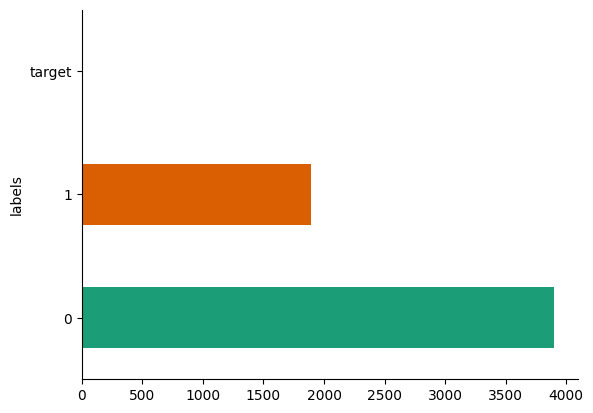

In [ ]:
# @title labels

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('labels').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
!pip install bert-for-tf2
!pip install sentencepiece
!pip install bert
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

  Using cached bert-for-tf2-0.14.9.tar.gz (41 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bert: filename=bert-2.2.0-py3-none-any.whl size=3744 sha256=b67e019b770ae96879b637403c9fee4e749e228dc36e719c0e5c65a604006dbb
  Stored in directory: /root/.cache/pip/wheels/55/82/8d/a9bad0b8280eb858aa3dcb4e617ee5a1653fdeb239e1e8c3fe
  Created wheel for erlastic: filename=erlastic-2.0.0-py3-none-any.whl size=6780 sha256=d7268826dc18fca229e8a0f28cb5283b0b4420641b5

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

import re
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
#CLean all emails
emails = []
sentences = list(df['messages'])
for sen in sentences:
    emails.append(preprocess_text(sen))

In [ ]:
import numpy as np
y = df['labels']
y = np.array(list(map(lambda x: 1 if x=="1" else 0, y)))

print(emails[10])

From contractor goldenbay com cy Tue Jul Return Path Delivered To yyyy localhost netnoteinc com Received from localhost localhost by phobos labs netnoteinc com Postfix with ESMTP id BBB CC for Tue Jul EDT Received from dogma slashnull org by localhost with IMAP fetchmail for jm localhost single drop Tue Jul IST Received from mandark labs netnoteinc com by dogma slashnull org with ESMTP id NMWA for Tue Jul Received from post unedcol cefetes br by mandark labs netnoteinc com with ESMTP id NMVMp for Tue Jul Received from main gate pl by post unedcol cefetes br with SMTP Microsoft Exchange Internet Mail Service Version id K NJ Mon Jul Message Id To From Business Services Subject Qualified Potential Clients For Your Industry Date Mon Jul MIME Version Mailer Microsoft Outlook Express Content Type text html charset iso Content Transfer Encoding quoted printable Online Marketing Strategies Need More Clients Increase Your Sales Every Month Targeted mail Marketing Is Proven Method For Return Sal

#TFIDF


In [66]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(emails).toarray()
feature_names = tfidf.get_feature_names_out()

In [67]:
!pip install transformers
from transformers import BertTokenizer

# Load the pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [68]:
!pip install transformers
from transformers import BertTokenizer
import tensorflow_hub as hub

# Load the pre-trained BERT layer
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)

# Load the pre-trained tokenizer (using the correct method)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example usage:
text = "This is a test sentence."
tokens = tokenizer.tokenize(text)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print("Tokens:", tokens)
print("Token IDs:", token_ids)

Tokens: ['this', 'is', 'a', 'test', 'sentence', '.']
Token IDs: [2023, 2003, 1037, 3231, 6251, 1012]


In [70]:
tokenizer.tokenize("don't be so judgmental")  ## Below is the output
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("dont be so judgmental"))

[2123, 2102, 2022, 2061, 8689, 2389]

#Feature Reduction

___________________________________________________________________________


In [69]:
# Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(emails).toarray()
feature_names = tfidf.get_feature_names_out()

# Grey Wolf Optimization for feature selection
class GWO_FeatureSelector:
    def __init__(self, n_features, n_wolves=5, max_iter=10):
        self.n_features = n_features
        self.n_wolves = n_wolves
        self.max_iter = max_iter
        self.alpha_score = float('inf')
        self.alpha_pos = None
        self.beta_pos = None
        self.delta_pos = None

    def fitness_function(self, position, X, y):
        selected = position > 0.5
        if np.sum(selected) == 0:
            return float('inf')

        from sklearn.model_selection import train_test_split
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import accuracy_score

        X_selected = X[:, selected]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

        model = RandomForestClassifier(n_estimators=50, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # We want to maximize accuracy and minimize number of features
        return (1 - accuracy) + 0.1 * (np.sum(selected) / self.n_features)

    def optimize(self, X, y):
        dim = X.shape[1]
        wolves = np.random.rand(self.n_wolves, dim)
        fitness = np.array([self.fitness_function(wolf, X, y) for wolf in wolves])

        # Initialize alpha, beta, delta
        sorted_idx = np.argsort(fitness)
        self.alpha_pos = wolves[sorted_idx[0]]
        self.beta_pos = wolves[sorted_idx[1]]
        self.delta_pos = wolves[sorted_idx[2]]
        self.alpha_score = fitness[sorted_idx[0]]
        beta_score = fitness[sorted_idx[1]]
        delta_score = fitness[sorted_idx[2]]

        # Optimization loop
        for iter in range(self.max_iter):
            a = 2 - iter * (2 / self.max_iter)  # a decreases linearly from 2 to 0

            for i in range(self.n_wolves):
                for j in range(dim):
                    # Update positions
                    r1 = np.random.rand()
                    r2 = np.random.rand()

                    A1 = 2 * a * r1 - a
                    C1 = 2 * r2

                    D_alpha = abs(C1 * self.alpha_pos[j] - wolves[i,j])
                    X1 = self.alpha_pos[j] - A1 * D_alpha

                    r1 = np.random.rand()
                    r2 = np.random.rand()

                    A2 = 2 * a * r1 - a
                    C2 = 2 * r2

                    D_beta = abs(C2 * self.beta_pos[j] - wolves[i,j])
                    X2 = self.beta_pos[j] - A2 * D_beta

                    r1 = np.random.rand()
                    r2 = np.random.rand()

                    A3 = 2 * a * r1 - a
                    C3 = 2 * r2

                    D_delta = abs(C3 * self.delta_pos[j] - wolves[i,j])
                    X3 = self.delta_pos[j] - A3 * D_delta

                    wolves[i,j] = (X1 + X2 + X3) / 3

                # Clip to [0,1]
                wolves[i] = np.clip(wolves[i], 0, 1)

                # Calculate new fitness
                current_fitness = self.fitness_function(wolves[i], X, y)

                # Update alpha, beta, delta
                if current_fitness < self.alpha_score:
                    self.alpha_score = current_fitness
                    self.alpha_pos = wolves[i].copy()
                elif current_fitness < beta_score:
                    beta_score = current_fitness
                    self.beta_pos = wolves[i].copy()
                elif current_fitness < delta_score:
                    delta_score = current_fitness
                    self.delta_pos = wolves[i].copy()

            if iter % 10 == 0:
                print(f'Iteration {iter}, Best Fitness: {self.alpha_score}, Features Selected: {np.sum(self.alpha_pos > 0.5)}')

        # Return selected features
        selected = self.alpha_pos > 0.5
        return selected, self.alpha_pos



In [71]:
# Apply GWO feature selection
print("\nStarting GWO Feature Selection...")
gwo_fs = GWO_FeatureSelector(n_features=X_tfidf.shape[1], n_wolves=15, max_iter=50)
selected_features, feature_weights = gwo_fs.optimize(X_tfidf, y)

# Display selected features
selected_indices = np.where(selected_features)[0]
print("\nSelected Features:")
for idx in selected_indices:
    print(f"Feature: {feature_names[idx]}, Type: TF-IDF Score, Weight: {feature_weights[idx]:.4f}")

print(f"\nTotal Features Selected: {len(selected_indices)} out of {X_tfidf.shape[1]}")



Starting GWO Feature Selection...
Iteration 0, Best Fitness: 0.05012068965517238, Features Selected: 415
Iteration 10, Best Fitness: 0.02715862068965516, Features Selected: 194
Iteration 20, Best Fitness: 0.02013448275862073, Features Selected: 141
Iteration 30, Best Fitness: 0.01621034482758619, Features Selected: 119
Iteration 40, Best Fitness: 0.014348275862068972, Features Selected: 109

Selected Features:
Feature: 0000ff, Type: TF-IDF Score, Weight: 0.6133
Feature: 03, Type: TF-IDF Score, Weight: 0.7652
Feature: 10, Type: TF-IDF Score, Weight: 0.8659
Feature: 145, Type: TF-IDF Score, Weight: 0.8892
Feature: 2000, Type: TF-IDF Score, Weight: 0.7213
Feature: 21, Type: TF-IDF Score, Weight: 0.7079
Feature: 210, Type: TF-IDF Score, Weight: 0.5990
Feature: 216, Type: TF-IDF Score, Weight: 0.6681
Feature: 218, Type: TF-IDF Score, Weight: 0.6012
Feature: 22, Type: TF-IDF Score, Weight: 0.6676
Feature: 36, Type: TF-IDF Score, Weight: 0.9033
Feature: 3b, Type: TF-IDF Score, Weight: 0.5738

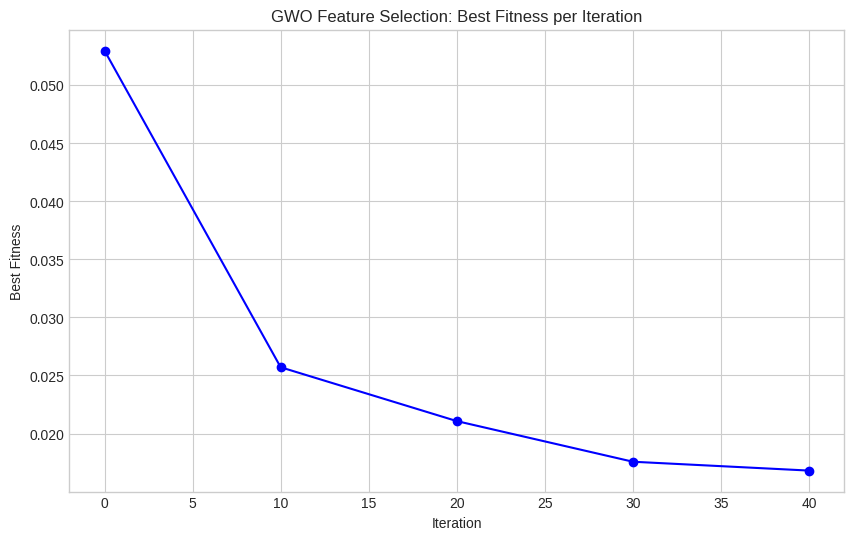

In [72]:
iterations = [0, 10, 20, 30, 40]
best_fitness_values = [0.052982758620689706, 0.02571034482758619, 0.021072413793103404, 0.017572413793103404, 0.01681034482758619]

plt.figure(figsize=(10, 6))
plt.plot(iterations, best_fitness_values, marker='o', linestyle='-', color='b')
plt.title('GWO Feature Selection: Best Fitness per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.grid(True)
plt.show()

NO

In [73]:
# Prepare data with selected features
from sklearn.model_selection import train_test_split # Import train_test_split

# Apply GWO feature selection
print("\nStarting GWO Feature Selection...")
gwo_fs = GWO_FeatureSelector(n_features=X_tfidf.shape[1], n_wolves=5, max_iter=10)
selected_features, feature_weights = gwo_fs.optimize(X_tfidf, y)

X_selected = X_tfidf[:, selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


Starting GWO Feature Selection...
Iteration 0, Best Fitness: 0.05454482758620692, Features Selected: 442


#Create Model

In [74]:
#Create Model
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from keras import regularizers # Import regularizers
import matplotlib.pyplot as plt
import seaborn as sns

# Define max_words and max_len (you may need to adjust these values based on your data)
max_words = 5000 # Example value, adjust as needed
max_len = 250 # Example value, adjust as needed

# Assuming you have your data loaded into variables named emails and labels
# If not, please load your data first
emails = df['messages'].values  # Example using the 'df' variable from your notebook
labels = df['labels'].values # Example using the 'df' variable from your notebook

X_train, X_test, Y_train, Y_test = train_test_split(emails, labels, test_size=0.2, random_state=42)

# Tokenize and pad sequences (assuming 'emails' and 'labels' are available from previous steps)
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)
# Y_train = labels # Assuming labels are your target variable

# Model with L2 regularization and dropout
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50)(inputs) # Removed input_length
    layer = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(layer) # Add dropout to LSTM layer
    layer = Dense(256,name='FC1', kernel_regularizer=regularizers.l2(0.01))(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer) # Increased dropout rate
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

# Convert Y_train to numerical labels
label_encoder = LabelEncoder()
# Assuming Y_train is defined from your previous steps
Y_train_encoded = label_encoder.fit_transform(Y_train)


# Assuming sequences_matrix and Y_train_encoded are available from previous steps
# Fit the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) #Patience is increased
history = model.fit(sequences_matrix, Y_train_encoded, batch_size=128, epochs=20, # Increased epochs
                    validation_split=0.2, callbacks=[early_stopping])

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputs (InputLayer)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, 250, 50)        │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ out_layer (Dense)               │ (None, 1)              │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,337 (1.13 MB)

 Trainable params: 296,337 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 627ms/step - accuracy: 0.6784 - loss: 1.4522 - val_accuracy: 0.9461 - val_loss: 0.7041
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 662ms/step - accuracy: 0.9431 - loss: 0.6310 - val_accuracy: 0.9806 - val_loss: 0.3256
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 567ms/step - accuracy: 0.9828 - loss: 0.2758 - val_accuracy: 0.9871 - val_loss: 0.1581
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 574ms/step - accuracy: 0.9867 - loss: 0.1300 - val_accuracy: 0.9817 - val_loss: 0.0910
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 587ms/step - accuracy: 0.9863 - loss: 0.0793 - val_accuracy: 0.9871 - val_loss: 0.0658
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 584ms/step - accuracy: 0.9919 - loss: 0.0489 - val_accuracy: 0.9849 - val_loss: 0.0632
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 590ms/step - accuracy: 0.9948 - loss: 0.0375 - val_accuracy: 0.9892 - val_loss: 0.0558
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 572ms/step - accuracy: 0.9947 - loss: 0.0370 - val_accu

#Evaluate Model

37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step
Accuracy: 0.9879310344827587
Precision: 0.9741602067183462
Recall: 0.989501312335958
F1 Score: 0.9817708333333334
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       779
           1       0.97      0.99      0.98       381

    accuracy                           0.99      1160
   macro avg       0.98      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



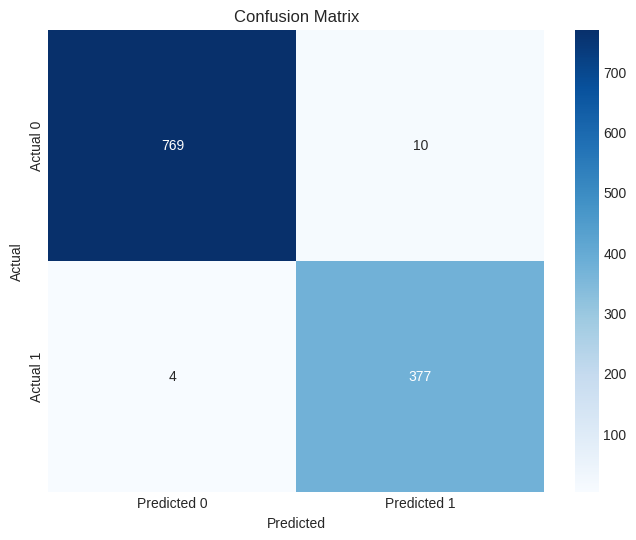

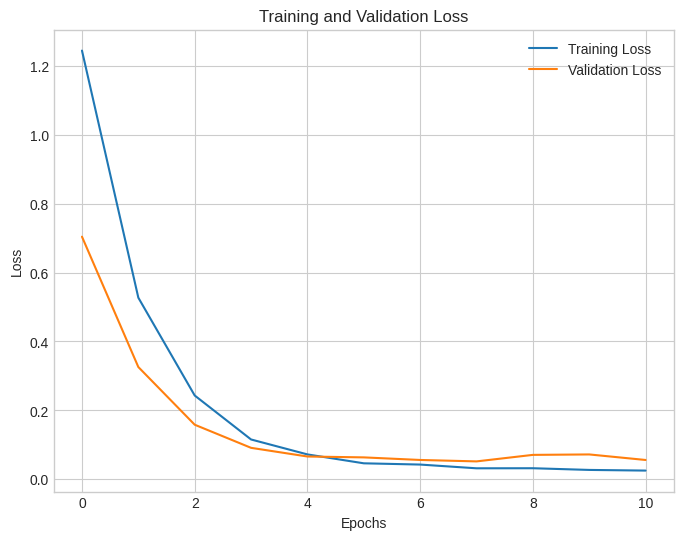

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.optimizers import RMSprop
from keras import regularizers

test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

# Predict on the test data
predictions = model.predict(test_sequences_matrix)

# Convert predictions to binary labels
binary_predictions = (predictions > 0.5).astype(int).flatten()

# Convert Y_test to numerical labels if not already
Y_test_encoded = label_encoder.transform(Y_test) # Use transform, not fit_transform


# Calculate and print the metrics
accuracy = accuracy_score(Y_test_encoded, binary_predictions)
precision = precision_score(Y_test_encoded, binary_predictions)
recall = recall_score(Y_test_encoded, binary_predictions)
f1 = f1_score(Y_test_encoded, binary_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print(classification_report(Y_test_encoded, binary_predictions))

# Assuming 'binary_predictions' and 'Y_test_encoded' are already defined
cm = confusion_matrix(Y_test_encoded, binary_predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#Plot the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
# prompt: print accuracy precison recall f1 score

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from keras.optimizers import RMSprop
from keras.models import Model
from keras import regularizers
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

# Predict on the test data
predictions = model.predict(test_sequences_matrix)

# Convert predictions to binary labels
binary_predictions = (predictions > 0.5).astype(int).flatten()

# Convert Y_test to numerical labels if not already
Y_test_encoded = label_encoder.transform(Y_test) # Use transform, not fit_transform


# Calculate and print the metrics
accuracy = accuracy_score(Y_test_encoded, binary_predictions)
precision = precision_score(Y_test_encoded, binary_predictions)
recall = recall_score(Y_test_encoded, binary_predictions)
f1 = f1_score(Y_test_encoded, binary_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Accuracy: 0.9879310344827587
Precision: 0.9741602067183462
Recall: 0.989501312335958
F1 Score: 0.9817708333333334


In [ ]:
cm

array([[773,   6],
       [  4, 377]])

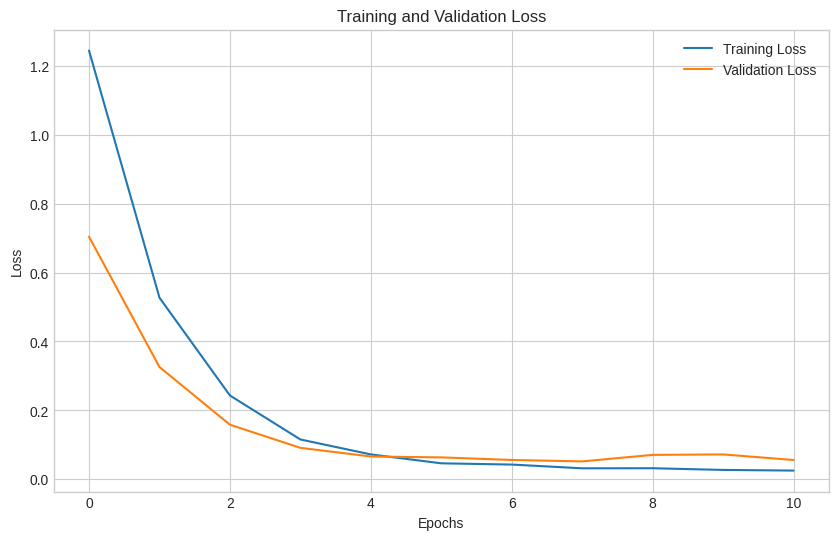

In [77]:
# prompt: plot generaliation

import matplotlib.pyplot as plt

# Assuming 'history' object from model.fit() is available

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

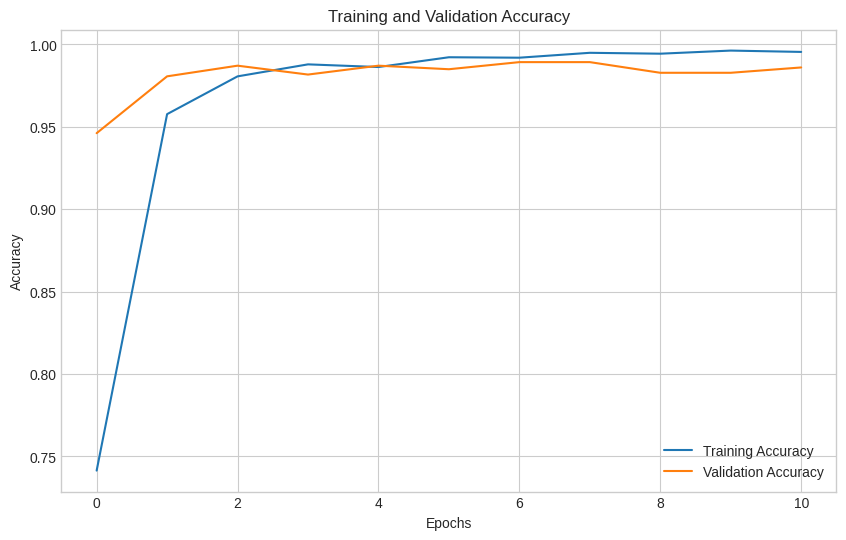

In [78]:
# prompt: plot accuracy and loss summary

import matplotlib.pyplot as plt

# Assuming 'history' object from model.fit() is available

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
# prompt: print classification report

from sklearn.metrics import classification_report

print(classification_report(Y_test_encoded, binary_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       779
           1       0.97      0.99      0.98       381

    accuracy                           0.99      1160
   macro avg       0.98      0.99      0.99      1160
weighted avg       0.99      0.99      0.99      1160



Training time

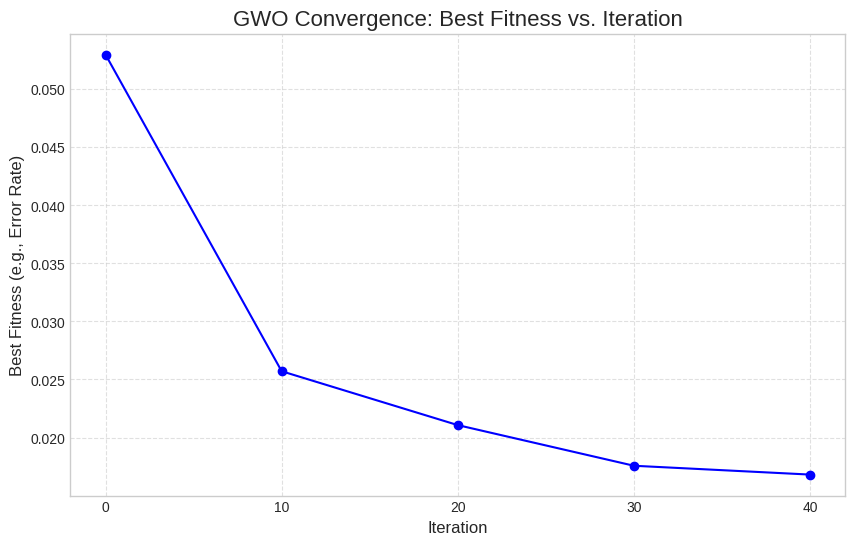

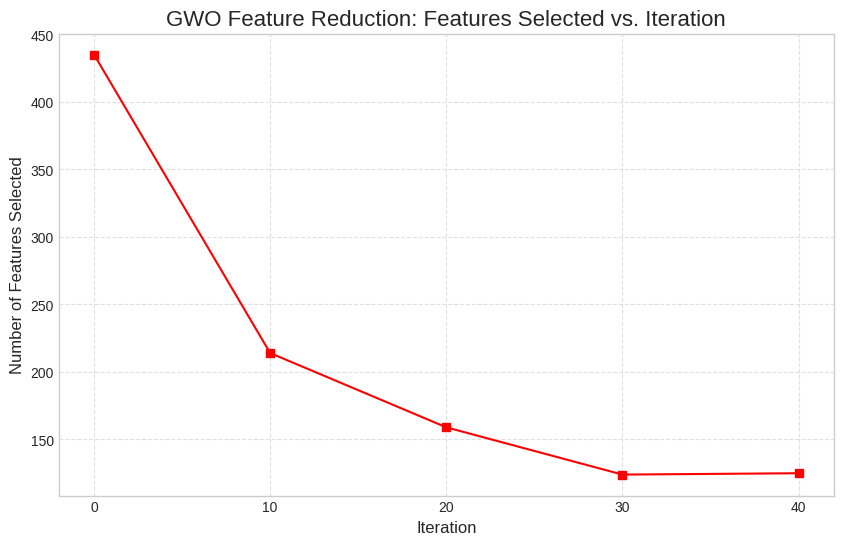

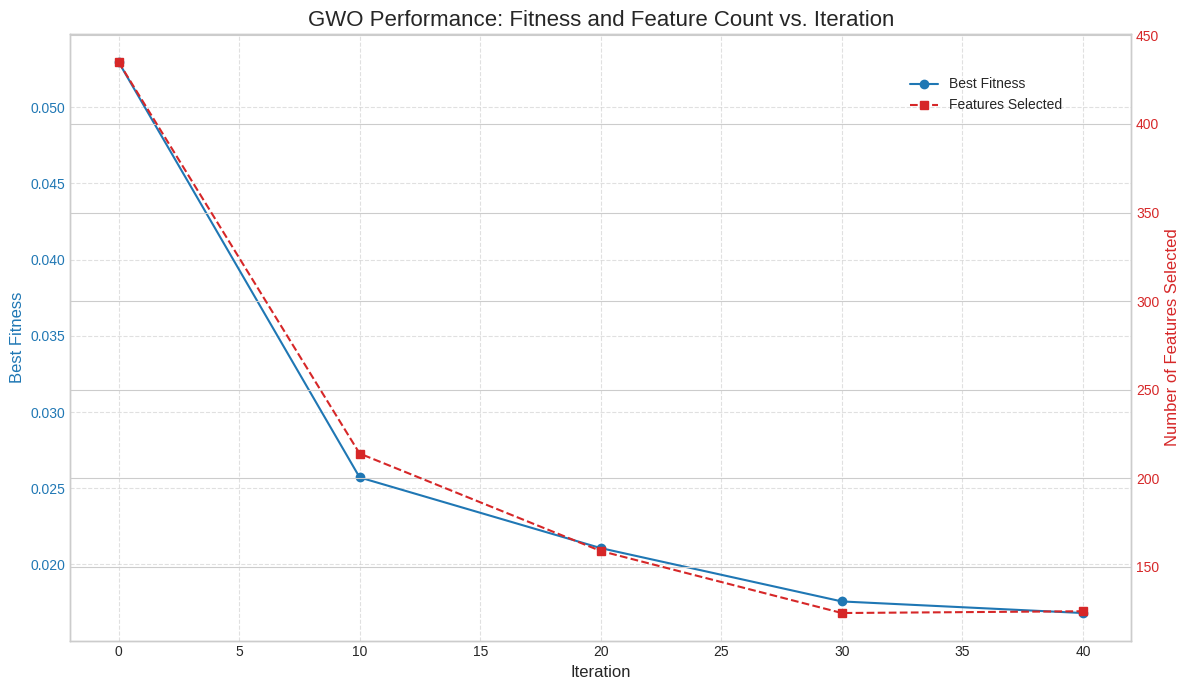

In [81]:
import matplotlib.pyplot as plt

# --- Your Data ---
iterations = [0, 10, 20, 30, 40]
best_fitness = [0.05298, 0.02571, 0.02107, 0.01757, 0.01681]
features_selected = [435, 214, 159, 124, 125]

# --- Graph 1: Best Fitness vs. Iteration (Convergence Curve) ---
plt.figure(figsize=(10, 6))
plt.plot(iterations, best_fitness, marker='o', linestyle='-', color='b')
plt.title('GWO Convergence: Best Fitness vs. Iteration', fontsize=16)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Best Fitness (e.g., Error Rate)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(iterations) # Ensure all iteration points are marked on the x-axis
plt.show()

# --- Graph 2: Number of Selected Features vs. Iteration ---
plt.figure(figsize=(10, 6))
plt.plot(iterations, features_selected, marker='s', linestyle='-', color='r')
plt.title('GWO Feature Reduction: Features Selected vs. Iteration', fontsize=16)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Number of Features Selected', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(iterations)
plt.show()

# --- Graph 3: Combined Dual-Axis Plot ---
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Best Fitness on the primary y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Best Fitness', color=color, fontsize=12)
ax1.plot(iterations, best_fitness, marker='o', linestyle='-', color=color, label='Best Fitness')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Number of Features Selected', color=color, fontsize=12)
ax2.plot(iterations, features_selected, marker='s', linestyle='--', color=color, label='Features Selected')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and legend
plt.title('GWO Performance: Fitness and Feature Count vs. Iteration', fontsize=16)
fig.tight_layout() # Adjust plot to prevent labels from overlapping
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))
plt.show()

In [83]:
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import time

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate True Negative Rate (TNR) or Specificity
true_negative_rate = tn / (tn + fp) if (tn + fp) != 0 else 0

print(f"True Negative Rate (TNR): {true_negative_rate}")

# Calculate False Negative Rate (FNR)
false_negative_rate = fn / (fn + tp) if (fn + tp) != 0 else 0

print(f"False Negative Rate (FNR): {false_negative_rate}")

True Negative Rate (TNR): 0.9871630295250321
False Negative Rate (FNR): 0.010498687664041995


In [85]:
# prompt: write number of spams and hams selected by model

# Count the number of spams and hams in the predictions
predicted_spams = np.sum(binary_predictions == 1)
predicted_hams = np.sum(binary_predictions == 0)

print(f"\nNumber of spams selected by the model: {predicted_spams}")
print(f"Number of hams selected by the model: {predicted_hams}")


Number of spams selected by the model: 387
Number of hams selected by the model: 773


In [86]:
# prompt: write spam detection rate

# Count the number of actual spam messages in the test set
actual_spams = np.sum(Y_test_encoded == 1)

# Count the number of spam messages correctly identified (True Positives)
true_positives = np.sum((Y_test_encoded == 1) & (binary_predictions == 1))

# Calculate the spam detection rate (Recall for the positive class)
# Spam Detection Rate = True Positives / Actual Spams
spam_detection_rate = true_positives / actual_spams if actual_spams != 0 else 0

print(f"\nSpam Detection Rate: {spam_detection_rate:.4f}")


Spam Detection Rate: 0.9895
